1. Change the number of observations to 100,000 and see what happens.

Find the variable "observations" and change it to 100000, instead of 1000.

Here are some takeaways:
1. It takes the algorithm much more time to solve the problem.
2. The result is the same as we SCALED the deltas, so the number of observations doesn't matter.
3. matplotlib cannot plot the data, as there are too many points.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
observations =100000

xs = np.random.uniform(-10,10,size=(observations,1))
zs = np.random.uniform(-10,10,size=(observations,1))

inputs = np.column_stack((xs,zs))
print(inputs.shape)

(100000, 2)


In [3]:
noise = np.random.uniform(-1,1,(observations,1))

targets = 2*xs - 3*zs + 5 + noise
print(targets.shape) 

(100000, 1)


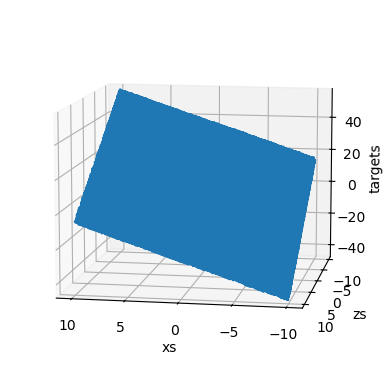

In [4]:
fig = plt.figure()
ax =fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')

ax.view_init(elev=10,azim=100)
plt.show()

In [5]:
init_range =0.1
weights = np.random.uniform(-init_range, init_range, size=(2,1))
biases = np.random.uniform(-init_range, init_range,size=1)

print(weights)
print(biases)

[[-0.05509732]
 [ 0.0451676 ]]
[0.09851924]


In [6]:
learning_rate = 0.02

for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations
    
    print(loss)
    
    deltas_scaled = deltas / observations
    
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    

237.6514451482757
36.439027562904535
13.957551473305951
11.102235896514662
10.4158030621659
9.982143597473824
9.59041342600324
9.216912690234938
8.858500741808536
8.514314596028349
8.183761774142742
7.866299199578192
7.561408148949314
7.268590752836972
6.987368891709202
6.717283383279057
6.457893229237849
6.20877489480353
5.969521617126594
5.739742741119121
5.519063081588797
5.307122310632832
5.103574369291019
4.908086902497297
4.720340716407146
4.540029257214775
4.366858110609054
4.200544521050961
4.040816930087586
3.887414532948826
3.7400868527028117
3.598593331274735
3.4627029366612696
3.3321937856992565
3.2068527817727173
3.086475266866612
2.970864687399239
2.859832273287623
2.753196729721883
2.650783941145302
2.5524266869567294
2.4579643684711727
2.3672427466926753
2.280113690471398
2.196434934633611
2.11606984768975
2.0388872087411647
1.9647609932213737
1.8935701671219052
1.825198489366801
1.7595343220130433
1.696470447967031
1.6359038959194656
1.577735772212797
1.521871099366683

In [7]:
print(weights,biases)

[[ 1.99965615]
 [-2.99985054]] [4.34831615]


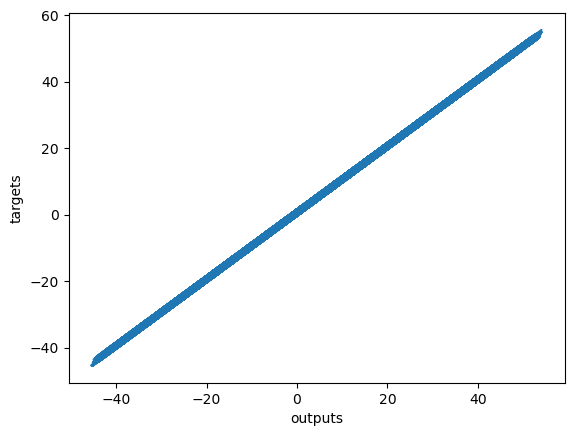

In [8]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()